In [130]:
import pandas as pd
%pylab inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.metrics import roc_curve
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [131]:
df=pd.read_csv("D:\Poojitha\Data_Science_Essentials\\train.csv")

In [132]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [133]:
df_1 = df['Survived']
df= df.drop(['Survived'],axis=1)
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
df.PassengerId.value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, dtype: int64

In [135]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [136]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [137]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [138]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

In [139]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [140]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [141]:
df.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [142]:
df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.8542      13
7.2500      13
7.2250      12
9.5000       9
16.1000      9
15.5000      8
24.1500      8
14.5000      7
7.0500       7
56.4958      7
52.0000      7
69.5500      7
31.2750      7
14.4542      7
27.9000      6
7.7958       6
30.0000      6
26.2500      6
            ..
6.9500       1
15.0500      1
21.6792      1
7.1417       1
15.0458      1
4.0125       1
12.0000      1
8.4583       1
7.7875       1
14.0000      1
15.0000      1
9.8417       1
12.2750      1
12.2875      1
22.5250      1
6.4500       1
15.5500      1
8.5167       1
63.3583      1
6.8583       1
22.0250      1
13.7917      1
221.7792     1
12.6500      1
8.8500       1
61.1750      1
10.1708      1
76.2917      1
15.1000      1
81.8583      1
Name: Fare, dtype: int64

In [143]:
df.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [144]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [146]:
df.fillna(df.mean(), inplace=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,female,38.000000,1,0,71.2833,C85,C
2,3,female,26.000000,0,0,7.9250,NaN,S
3,1,female,35.000000,1,0,53.1000,C123,S
4,3,male,35.000000,0,0,8.0500,NaN,S
5,3,male,29.699118,0,0,8.4583,NaN,Q
6,1,male,54.000000,0,0,51.8625,E46,S
7,3,male,2.000000,3,1,21.0750,NaN,S
8,3,female,27.000000,0,2,11.1333,NaN,S
9,2,female,14.000000,1,0,30.0708,NaN,C


In [147]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "N/A"

df["Cabin"] = df.Cabin.apply(clean_cabin)

In [148]:
categorical_variables = ['Sex', 'Embarked','Cabin']

for variable in categorical_variables:
    #Fill missing data with the word 'None'
    df[variable].fillna("None", inplace=True)
    #Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    #Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)


In [149]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N/A,Cabin_T
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.002245,0.086420,0.722783,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.771044,0.001122
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.047351,0.281141,0.447876,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.420397,0.033501
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
df.columns

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_female',
       u'Sex_male', u'Embarked_C', u'Embarked_None', u'Embarked_Q',
       u'Embarked_S', u'Cabin_A', u'Cabin_B', u'Cabin_C', u'Cabin_D',
       u'Cabin_E', u'Cabin_F', u'Cabin_G', u'Cabin_N/A', u'Cabin_T'],
      dtype='object')

In [151]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, df_1)
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(df_1, model.oob_prediction_)
print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.862482557334


C:\Users\Poojitha\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


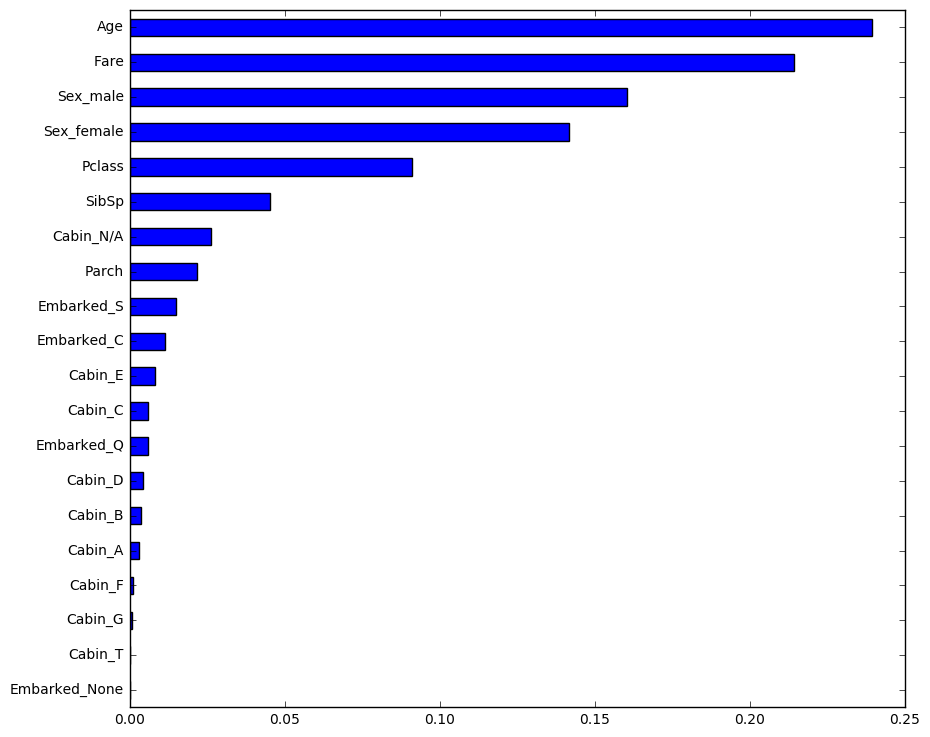

In [152]:
featureimportance = pd.Series(model.feature_importances_, index=df.columns)
featureimportance.sort()
featureimportance.plot(kind="barh", figsize=(10,9));

In [153]:
del df['Embarked_None']
del df['Cabin_T']

In [154]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, df_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [155]:
roc = roc_auc_score(df_1, model.oob_prediction_)
print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.862786139605


In [156]:
del df['Cabin_G']
del df['Cabin_F']

In [157]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, df_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [158]:
roc = roc_auc_score(df_1, model.oob_prediction_)
print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.862117726009


In [159]:
del df['Cabin_A']

In [160]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, df_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [161]:
roc = roc_auc_score(df_1, model.oob_prediction_)
print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.865723431225


In [162]:
#del df['Cabin_B']

In [163]:
#model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(df, df_1)

In [32]:
#roc = roc_auc_score(df_1, model.oob_prediction_)
#print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.864365300014


In [126]:
#del df['Cabin_D']

In [128]:
#model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(df, df_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [129]:
#roc = roc_auc_score(df_1, model.oob_prediction_)
#print "C-stat: ", roc_auc_score(df_1, model.oob_prediction_)

C-stat:  0.863537106275


30 trees
C-stat:  0.8549329456

50 trees
C-stat:  0.862975212774

100 trees
C-stat:  0.865723431225

200 trees
C-stat:  0.863435912185

500 trees
C-stat:  0.863462542209

1000 trees
C-stat:  0.863270806038

2000 trees
C-stat:  0.863166948945



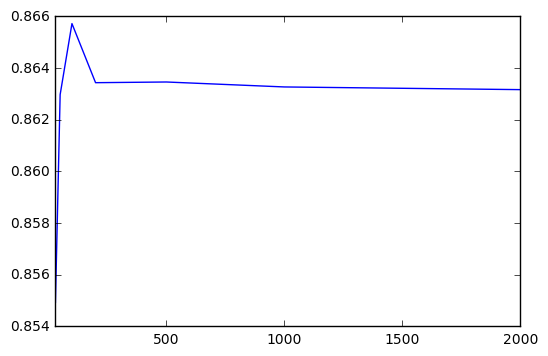

In [164]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model1 = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model1.fit(df, df_1)
    print trees, "trees"
    roc = roc_auc_score(df_1, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.863270806038

None option
C-stat:  0.863270806038

sqrt option
C-stat:  0.862503861353

log2 option
C-stat:  0.862503861353

0.9 option
C-stat:  0.86381139552

0.2 option
C-stat:  0.862503861353



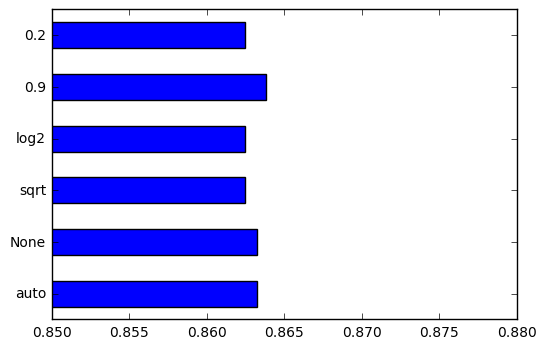

In [165]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model1 = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model1.fit(df, df_1)
    print max_features, "option"
    roc = roc_auc_score(df_1, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.863270806038

2 min samples
C-stat:  0.869126748261

3 min samples
C-stat:  0.871012153943

4 min samples
C-stat:  0.87347543114

5 min samples
C-stat:  0.874492698047

6 min samples
C-stat:  0.873965423577

7 min samples
C-stat:  0.873400867074

8 min samples
C-stat:  0.871856325696

9 min samples
C-stat:  0.869438319539

10 min samples
C-stat:  0.86738780771



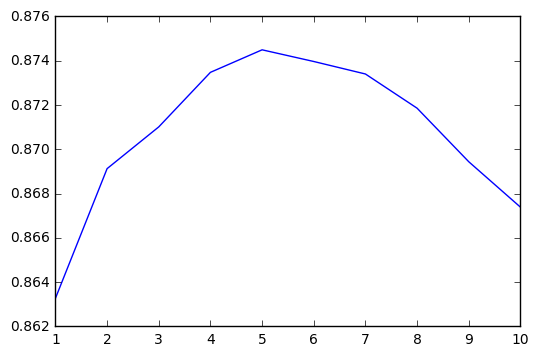

In [166]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model1 = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model1.fit(df, df_1)
    print min_samples, "min samples"
    roc = roc_auc_score(df_1, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [167]:
model1 = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=5)
model1.fit(df, df_1)
roc = roc_auc_score(df_1, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.871523450399


Final Model

In [168]:
model1 = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model1.fit(df, df_1)
roc = roc_auc_score(df_1, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.874492698047
